C:\Users\Jan Tinio\AppData\Local\Temp\ipykernel_18036\816802576.py:22: RuntimeWarning: invalid value encountered in sqrt
  volatility[t] = np.sqrt(alpha0[t] + alpha1[t] * returns[t-1]**2)


mu          0.446081
omega       0.835309
alpha[1]    0.712342
beta[1]     0.055625
Name: params, dtype: float64


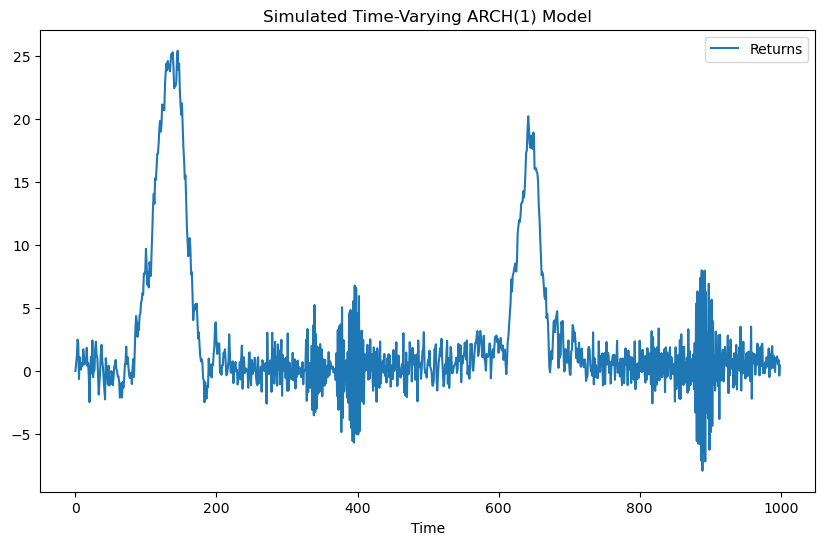

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of observations
n = 1000

# Generate the time-varying parameters
alpha0 = np.linspace(0.2, 0.8, n)
alpha1 = np.sin(np.linspace(0, 4 * np.pi, n))

# Simulate the time series
eps = np.random.randn(n)
returns = np.zeros(n)
volatility = np.zeros(n)

for t in range(1, n):
    returns[t] = alpha0[t] + alpha1[t] * returns[t-1] + eps[t]
    volatility[t] = np.sqrt(alpha0[t] + alpha1[t] * returns[t-1]**2)

# Fit an ARCH(1) model to estimate the parameters
model = arch_model(returns)
model_fit = model.fit(disp='off')

# Print the estimated parameters
print(model_fit.params)

# Plot the time series and estimated volatility
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns')
#plt.plot(volatility, label='Volatility')
plt.title('Simulated Time-Varying ARCH(1) Model')
plt.xlabel('Time')
plt.legend()
plt.show()

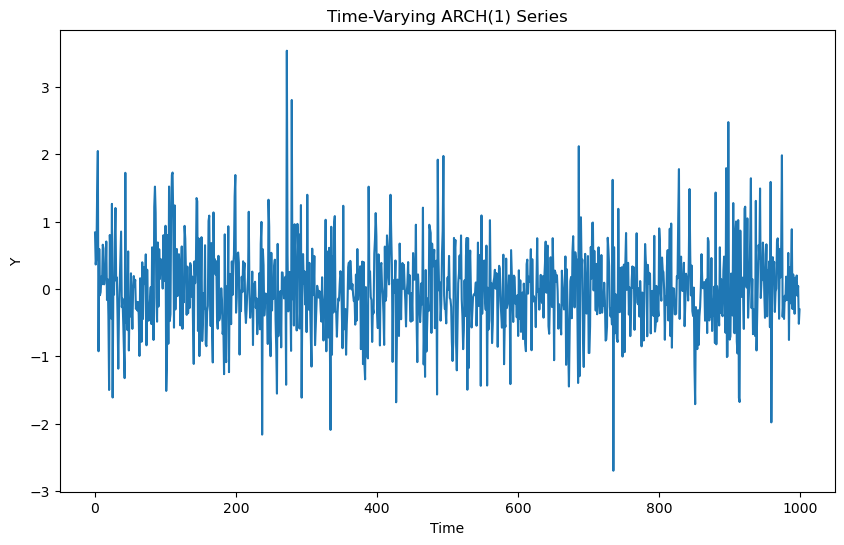

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of observations and time periods
n_obs = 1000
n_periods = 10

# Set the initial ARCH(1) parameter values
arch_param_initial = 0.2

# Set the time-varying ARCH(1) parameter values for each period
arch_params = [0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.1, 0.2, 0.3, 0.4]

# Generate the time-varying ARCH(1) series
np.random.seed(0)
errors = np.random.randn(n_obs)
variances = np.zeros(n_obs)
series = np.zeros(n_obs)

for i in range(n_obs):
    period = i // (n_obs // n_periods)
    arch_param = arch_params[period]
    variances[i] = arch_param_initial + arch_param * errors[i-1]**2
    series[i] = np.sqrt(variances[i]) * errors[i]

# Plot the simulated series
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title("Time-Varying ARCH(1) Series")
plt.xlabel("Time")
plt.ylabel("V")
plt.show()


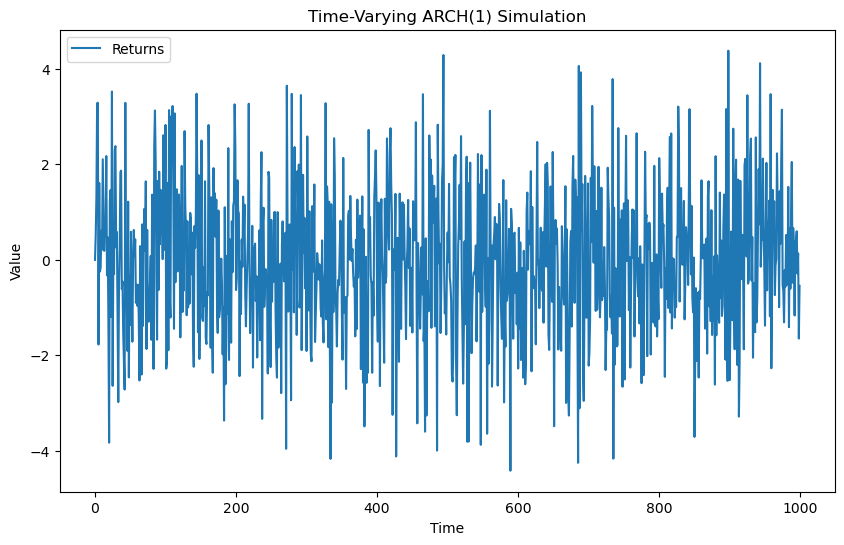

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of observations
sigma0 = 1  # Initial volatility
alpha0 = 0.2  # Initial ARCH parameter
beta0 = 0.5  # Initial GARCH parameter

# Generate time-varying parameters
t = np.arange(n)
alpha = alpha0 + 0.01 * np.sin(2 * np.pi * t / 100)  # Time-varying ARCH parameter
beta = beta0 + 0.01 * np.cos(2 * np.pi * t / 100)  # Time-varying GARCH parameter

# Generate ARCH(1) time series
np.random.seed(0)
epsilon = np.random.normal(0, 1, n)  # White noise
volatility = np.zeros(n)
returns = np.zeros(n)

# Compute returns and volatility
for i in range(1, n):
    volatility[i] = np.sqrt(sigma0 + alpha[i-1] * epsilon[i-1]**2 + beta[i-1] * volatility[i-1]**2)
    returns[i] = epsilon[i] * volatility[i]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns')
#plt.plot(volatility, label='Volatility')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time-Varying ARCH(1) Simulation')
plt.legend()
plt.show()


In [8]:
import numpy as np
from arch import arch_model

# Set random seed for reproducibility
np.random.seed(123)

# Define the number of observations
n = 1000

# Simulate the time-varying parameters
alpha0 = np.random.normal(0.05, 0.01, n)
alpha1 = np.random.normal(0.2, 0.05, n)
alpha2 = np.random.normal(0.3, 0.1, n)

# Simulate the time series data
errors = np.random.normal(0, 1, n)
returns = np.zeros(n)

for i in range(2, n):
    sigma = np.sqrt(alpha0[i] + alpha1[i] * returns[i-1]**2 + alpha2[i] * returns[i-2]**2)
    returns[i] = errors[i] * sigma

# Fit an ARCH(2) model with time-varying parameters
model = arch_model(returns, vol='ARCH', p=2)
results = model.fit(disp='off')

# Print the estimated parameters
print(results.params)


mu          0.011255
omega       0.052479
alpha[1]    0.202053
alpha[2]    0.214365
Name: params, dtype: float64


C:\Users\Jan Tinio\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08992. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


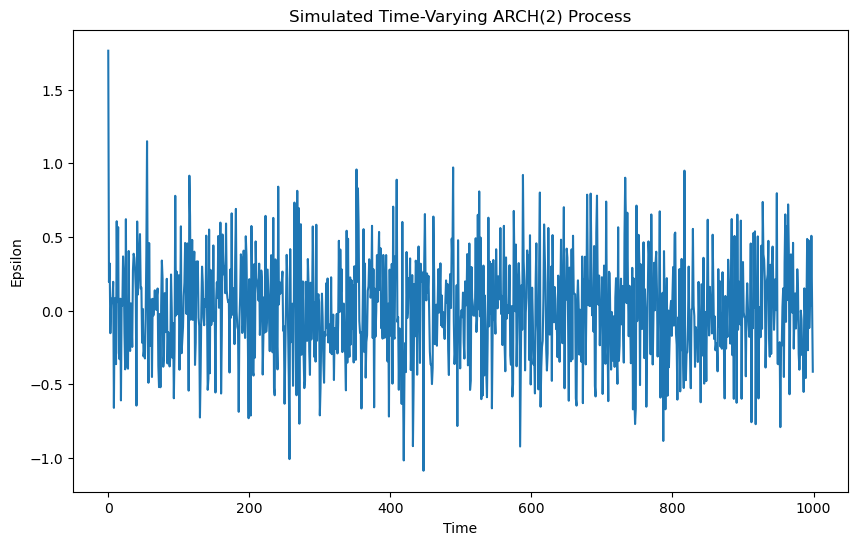

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Simulate a time-varying ARCH(2) model
def simulate_time_varying_arch2(n, alpha0, alpha1, alpha2):
    # Initialize variables
    epsilon = np.random.randn(n)
    sigma2 = np.zeros(n)
    sigma2[0] = alpha0

    # Simulate the process
    for t in range(1, n):
        sigma2[t] = alpha0 + alpha1 * sigma2[t-1] + alpha2 * sigma2[t-1]**2
        epsilon[t] = np.sqrt(sigma2[t]) * np.random.randn()

    return epsilon

# Set the number of time steps
n = 1000

# Set the initial parameters
alpha0 = 0.1
alpha1 = 0.2
alpha2 = 0.3

# Simulate the time-varying ARCH(2) process
epsilon = simulate_time_varying_arch2(n, alpha0, alpha1, alpha2)

# Plot the simulated process
plt.figure(figsize=(10, 6))
plt.plot(epsilon)
plt.xlabel('Time')
plt.ylabel('Epsilon')
plt.title('Simulated Time-Varying ARCH(2) Process')
plt.show()


In [13]:
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of time periods
T = 100

# Generate time-varying parameters
alpha_0 = np.linspace(0.1, 0.5, T)
alpha_1 = np.linspace(0.2, 0.8, T)
alpha_2 = np.linspace(0.3, 0.9, T)

# Generate time series data
returns = np.random.randn(T)
volatility = np.zeros(T)

# Initialize the ARCH(2) model
model = arch_model(returns)

# Simulate the time series with time-varying parameters
for t in range(2, T):
    model.volatility.loc[t] = np.sqrt(alpha_0[t] + alpha_1[t] * returns[t-1]**2 + alpha_2[t] * returns[t-2]**2)
    volatility[t] = model.volatility.loc[t] * np.random.randn()

# Plot the simulated time series
plt.figure(figsize=(10, 6))
plt.plot(volatility, label='Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Simulation of Time-Varying ARCH(2) Model')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'GARCH' object has no attribute 'loc'

<Figure size 1000x600 with 0 Axes>

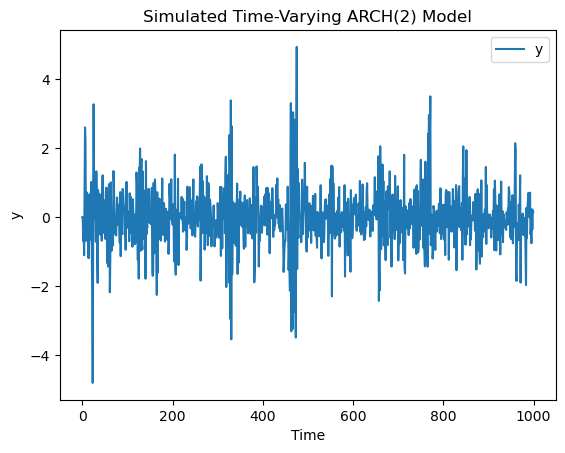

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameters
def time_varying_params(t):
    sigma_0 = 0.2
    sigma_1 = 0.5 + 0.2 * np.sin(0.1 * t)
    sigma_2 = 0.3 + 0.1 * np.cos(0.05 * t)
    return sigma_0, sigma_1, sigma_2

# Simulate the time-varying ARCH(2) model
def simulate_tv_arch(n, params_func):
    epsilon = np.random.normal(0, 1, n)
    y = np.zeros(n)
    sigma_squared = np.zeros(n)
    
    for t in range(2, n):
        sigma_0, sigma_1, sigma_2 = params_func(t)
        sigma_squared[t] = sigma_0 + sigma_1 * y[t-1]**2 + sigma_2 * y[t-2]**2
        y[t] = np.sqrt(sigma_squared[t]) * epsilon[t]
    
    return y, sigma_squared

# Set the number of observations
n = 1000

# Simulate the time-varying ARCH(2) model
y, sigma_squared = simulate_tv_arch(n, time_varying_params)

# Plot the simulated data and the time-varying parameters
plt.figure(figsize=(10, 6))
t = np.arange(n)
fig, ax1 = plt.subplots()

ax1.plot(t, y, label='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('y')

#ax2 = ax1.twinx()
#ax2.plot(t, sigma_squared, 'r-', label='Sigma^2')
#ax2.set_ylabel('Sigma^2', color='r')

plt.title('Simulated Time-Varying ARCH(2) Model')
plt.legend(loc='best')
plt.show()


<Figure size 1000x600 with 0 Axes>

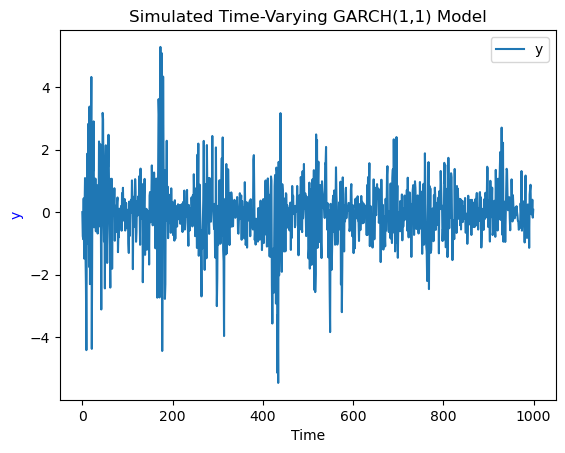

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameters
def time_varying_params(t):
    omega = 0.1 + 0.05 * np.sin(0.2 * t)
    alpha = 0.2 + 0.1 * np.cos(0.1 * t)
    beta = 0.6 + 0.2 * np.sin(0.05 * t)
    return omega, alpha, beta

# Simulate the time-varying GARCH(1,1) model
def simulate_tv_garch(n, params_func):
    epsilon = np.random.normal(0, 1, n)
    y = np.zeros(n)
    sigma_squared = np.zeros(n)
    
    for t in range(1, n):
        omega, alpha, beta = params_func(t)
        sigma_squared[t] = omega + alpha * y[t-1]**2 + beta * sigma_squared[t-1]
        y[t] = np.sqrt(sigma_squared[t]) * epsilon[t]
    
    return y, sigma_squared

# Set the number of observations
n = 1000

# Simulate the time-varying GARCH(1,1) model
y, sigma_squared = simulate_tv_garch(n, time_varying_params)

# Plot the simulated data and the time-varying parameters
plt.figure(figsize=(10, 6))
t = np.arange(n)
fig, ax1 = plt.subplots()

ax1.plot(t, y, label='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('y', color='b')

#ax2 = ax1.twinx()
#ax2.plot(t, sigma_squared, 'r-', label='Sigma^2')
#ax2.set_ylabel('Sigma^2', color='r')

plt.title('Simulated Time-Varying GARCH(1,1) Model')
plt.legend(loc='best')
plt.show()


<Figure size 1000x600 with 0 Axes>

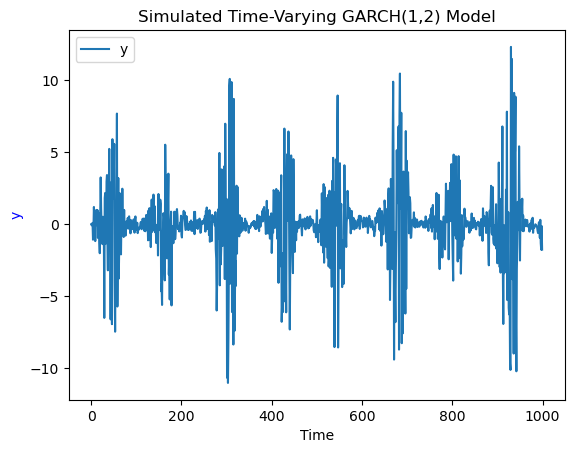

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameters
def time_varying_params(t):
    alpha_0 = 0.1 + 0.05 * np.sin(0.05 * t)
    alpha_1 = 0.2 + 0.1 * np.cos(0.1 * t)
    beta_1 = 0.3 + 0.2 * np.sin(0.05 * t)
    return alpha_0, alpha_1, beta_1

# Simulate the time-varying GARCH(1,2) model
def simulate_tv_garch(n, params_func):
    epsilon = np.random.normal(0, 1, n)
    y = np.zeros(n)
    sigma_squared = np.zeros(n)
    
    for t in range(2, n):
        alpha_0, alpha_1, beta_1 = params_func(t)
        sigma_squared[t] = alpha_0 + alpha_1 * y[t-1]**2 + beta_1 * sigma_squared[t-1] + beta_1 * sigma_squared[t-2]
        y[t] = np.sqrt(sigma_squared[t]) * epsilon[t]
    
    return y, sigma_squared

# Set the number of observations
n = 1000

# Simulate the time-varying GARCH(1,2) model
y, sigma_squared = simulate_tv_garch(n, time_varying_params)

# Plot the simulated data and the time-varying parameters
t = np.arange(n)
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots()

ax1.plot(t, y, label='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('y', color='b')

#ax2 = ax1.twinx()
#ax2.plot(t, sigma_squared, 'r-', label='Sigma^2')
#ax2.set_ylabel('Sigma^2', color='r')

plt.title('Simulated Time-Varying GARCH(1,2) Model')
plt.legend(loc='best')
plt.show()


<Figure size 1800x400 with 0 Axes>

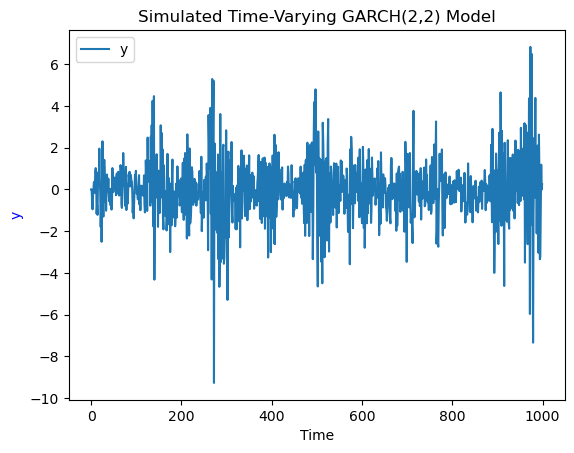

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameters
def time_varying_params(t):
    alpha_0 = 0.1 + 0.05 * np.sin(0.1 * t)
    alpha_1 = 0.2 + 0.1 * np.cos(0.05 * t)
    alpha_2 = 0.3 + 0.1 * np.sin(0.2 * t)
    beta_1 = 0.2 + 0.05 * np.cos(0.1 * t)
    beta_2 = 0.3 + 0.05 * np.sin(0.15 * t)
    return alpha_0, alpha_1, alpha_2, beta_1, beta_2

# Simulate the time-varying GARCH(2,2) model
def simulate_tv_garch(n, params_func):
    epsilon = np.random.normal(0, 1, n)
    y = np.zeros(n)
    sigma_squared = np.zeros(n)
    
    for t in range(2, n):
        alpha_0, alpha_1, alpha_2, beta_1, beta_2 = params_func(t)
        sigma_squared[t] = alpha_0 + alpha_1 * y[t-1]**2 + alpha_2 * y[t-2]**2 + beta_1 * sigma_squared[t-1] + beta_2 * sigma_squared[t-2]
        y[t] = np.sqrt(sigma_squared[t]) * epsilon[t]
    
    return y, sigma_squared

# Set the number of observations
n = 1000

# Simulate the time-varying GARCH(2,2) model
y, sigma_squared = simulate_tv_garch(n, time_varying_params)

# Plot the simulated data and the time-varying parameters
plt.figure(figsize=(18, 4))
t = np.arange(n)
fig, ax1 = plt.subplots()

ax1.plot(t, y, label='y')
ax1.set_xlabel('Time')
ax1.set_ylabel('y', color='b')

#ax2 = ax1.twinx()
#ax2.plot(t, sigma_squared, 'r-', label='Sigma^2')
#ax2.set_ylabel('Sigma^2', color='r')

plt.title('Simulated Time-Varying GARCH(2,2) Model')
plt.legend(loc='best')
plt.show()


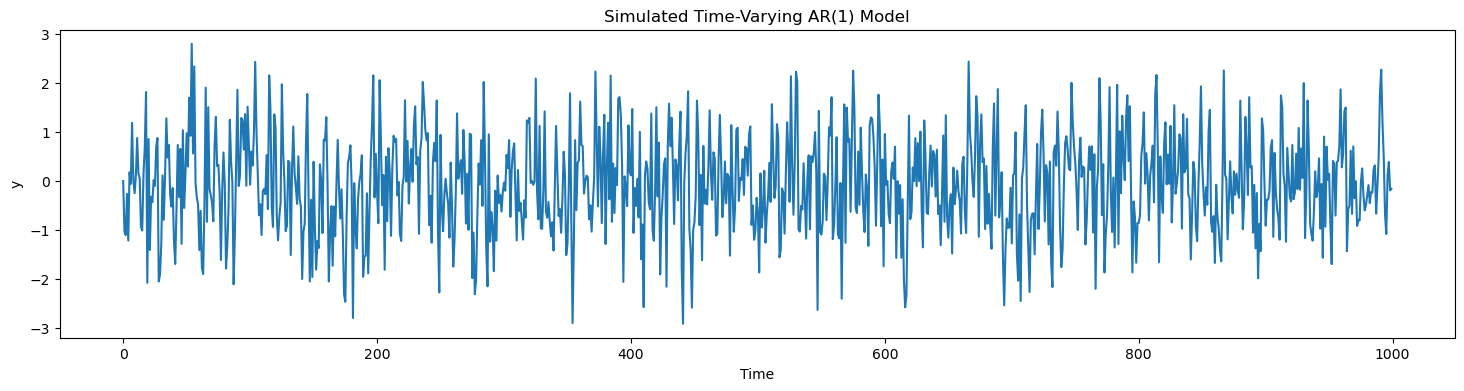

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameter
def time_varying_param(t):
    phi = 0.2 + 0.3 * np.sin(0.1 * t/T)
    return phi

# Simulate the time-varying AR(1) model
def simulate_tv_ar(n, param_func):
    epsilon = np.random.normal(0, 1, T)
    y = np.zeros(n)
    
    for t in range(1, n):
        phi = param_func(t)
        y[t] = phi * y[t-1] + epsilon[t]
    
    return y

# Set the number of observations
n = 1000

# Simulate the time-varying AR(1) model
y = simulate_tv_ar(n, time_varying_param)

# Plot the simulated data and the time-varying parameter
plt.figure(figsize=(18, 4))
t = np.arange(n)
plt.plot(t, y, label='y')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Simulated Time-Varying AR(1) Model')
plt.show()


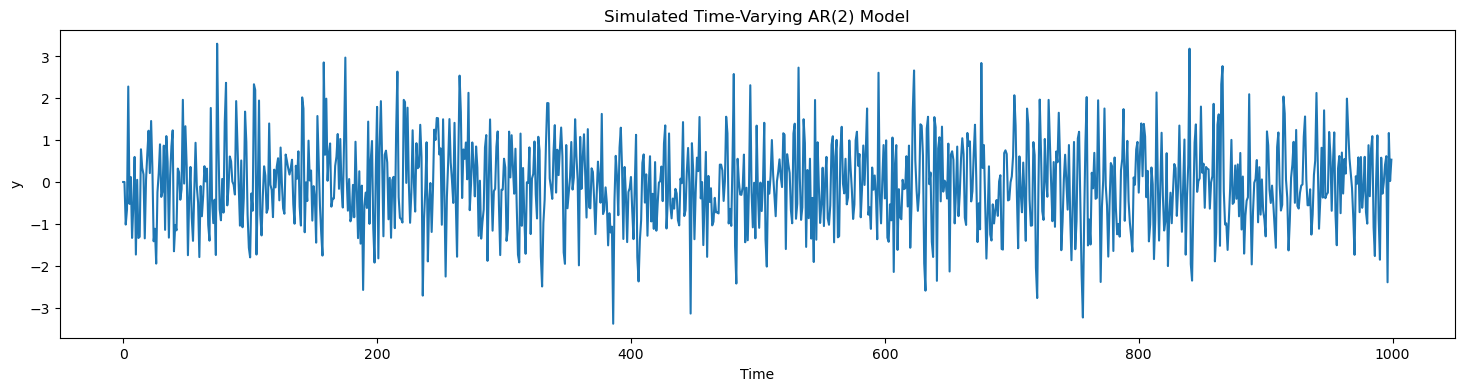

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time-varying parameters
def time_varying_params(t):
    phi_1 = 0.1 + 0.3 * np.sin(0.2 * t/n)
    phi_2 = -0.4 + 0.2 * np.cos(0.05 * t/n)
    return phi_1, phi_2

# Simulate the time-varying AR(2) model
def simulate_tv_ar(n, params_func):
    epsilon = np.random.normal(0, 1, n)
    y = np.zeros(n)
    
    for t in range(2, n):
        phi_1, phi_2 = params_func(t)
        y[t] = phi_1 * y[t-1] + phi_2 * y[t-2] + epsilon[t]
    
    return y

# Set the number of observations
n = 1000

# Simulate the time-varying AR(2) model
y = simulate_tv_ar(n, time_varying_params)

# Plot the simulated data
plt.figure(figsize=(18, 4))
t = np.arange(n)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Simulated Time-Varying AR(2) Model')
plt.show()
